# Seaborn Lighning Talk Demo 
Group 21, Plotters for Success

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Today, we will demonstrate the Capabilities of Seaborn using a dataset for NBA shots in the 2024 season. We will be highlighting 3 main functions of seaborn:
1. **Heatmaps**
2. **Built-in** Statistical Functions
3. **Multiplot**


In [3]:
data = pd.read_csv('NBA_2024_Shots.csv')
data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,11-03-2023,22300003,...,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-0.0,6.25,1,1,8,8


## Pandas Integration

### **Preparing Dataset**

We are then using the built-in statistical functions to establish relationships.

To demonstrate this, we are going to get shots from a few top players and relate it to the distance. To start, we isolated the columns of interest: **Name, Shot Distance, Player Name**

In [3]:
subset = data[['PLAYER_NAME', 'SHOT_DISTANCE', 'SHOT_MADE', 'GAME_DATE'] ]
subset.loc[:,'GAME_DATE'] = pd.to_datetime(subset['GAME_DATE'])
subset = subset.sort_values(by='PLAYER_NAME')
print(subset)

            PLAYER_NAME  SHOT_DISTANCE  SHOT_MADE            GAME_DATE
171653      A.J. Lawson              3      False  2024-01-31 00:00:00
174692      A.J. Lawson              0       True  2023-12-06 00:00:00
174759      A.J. Lawson              3       True  2023-12-08 00:00:00
172639      A.J. Lawson              0       True  2024-02-28 00:00:00
172268      A.J. Lawson              5      False  2024-02-14 00:00:00
...                 ...            ...        ...                  ...
87107   Zion Williamson              3      False  2024-04-09 00:00:00
86032   Zion Williamson              2      False  2024-03-15 00:00:00
86034   Zion Williamson              1       True  2024-03-15 00:00:00
87104   Zion Williamson              2       True  2024-04-09 00:00:00
81366   Zion Williamson              8      False  2023-11-06 00:00:00

[218701 rows x 4 columns]


We isolated the top 10 most frequent shooters in the NBA

In [4]:
unique_names = subset['PLAYER_NAME'].value_counts()
top_5 = unique_names.head(5).index.tolist()
print(top_5)


['Luka Doncic', 'Jalen Brunson', 'Anthony Edwards', "De'Aaron Fox", 'Shai Gilgeous-Alexander']


We will now generate a list of pandas dataset for made shots and failed shots

In [5]:
true_list = []
false_list=[]
shot_list= []
for player in top_5:
    player_shots = subset[subset['PLAYER_NAME'] == player]
    shots_by_bool = player_shots.groupby(['SHOT_DISTANCE', 'SHOT_MADE']).size().reset_index(name='Occurrences')
    shots_by_bool['Percentage'] = (shots_by_bool['Occurrences']/shots_by_bool['Occurrences'].sum())*100
    shot_list.append(shots_by_bool)
    true_list.append(shots_by_bool[shots_by_bool['SHOT_MADE']==True])
    false_list.append(shots_by_bool[shots_by_bool['SHOT_MADE']==False])

# Print Luka Doncic's stats

print('Player Name: ' + top_5[0])
print('Number of Shots Made at each distance')
print(true_list[0].head())

print('\n')
print('Number of Shots Missed at each distance')
print(false_list[0].head())

Player Name: Luka Doncic
Number of Shots Made at each distance
   SHOT_DISTANCE  SHOT_MADE  Occurrences  Percentage
1              0       True           48    2.905569
3              1       True           78    4.721550
5              2       True           44    2.663438
7              3       True           32    1.937046
9              4       True           25    1.513317


Number of Shots Missed at each distance
   SHOT_DISTANCE  SHOT_MADE  Occurrences  Percentage
0              0      False           12    0.726392
2              1      False            7    0.423729
4              2      False           15    0.907990
6              3      False           30    1.815981
8              4      False           11    0.665860


### Plotting Values ###
From there, we will demonstrate the **integration with Pandas**. 

The example will demonstrate the automatic handling of Pandas Dataframes with the use of **x**, **y**, and **hue**.

To demonstrate this, we first will create a relationship plot between the shots Luka Doncic shot in the 2023-2024 season and separating the data based on whether they made or missed it using matplotlib


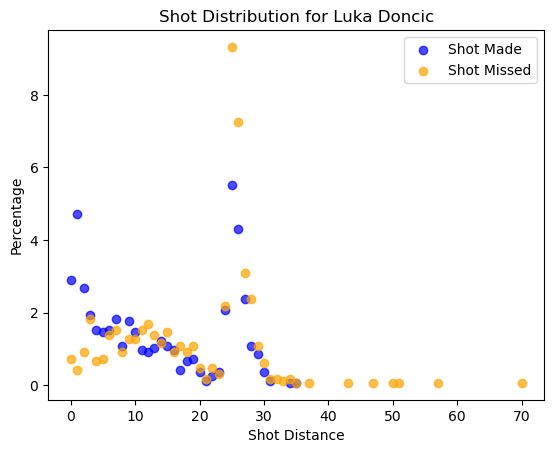

In [6]:
luka_data = shot_list[0]
made_shots = luka_data[luka_data['SHOT_MADE']== True]
missed_shots = luka_data[luka_data['SHOT_MADE']== False]


plt.scatter(made_shots['SHOT_DISTANCE'], made_shots['Percentage'], color = 'blue', label = 'Shot Made', alpha = 0.7)
plt.scatter(missed_shots['SHOT_DISTANCE'], missed_shots['Percentage'], color = 'orange', label = 'Shot Missed', alpha = 0.7)
plt.xlabel('Shot Distance')
plt.ylabel('Percentage')
plt.title('Shot Distribution for Luka Doncic')
plt.legend()
plt.show()


Now using seaborn, we cut down on the number of code by **not** having to isolate the pandas dataframes columns explicitly.

We were also able to handle categorical data with more ease with the help of **hue.** In our example, we only used a boolean of True or False but we can also use it for a categorical variable that is more than just a binary.

Furthermore, the labeling is automatic as Seaborn takes the column names from the Pandas Dataframe. However, you are also given the option to change up your axes titles. 

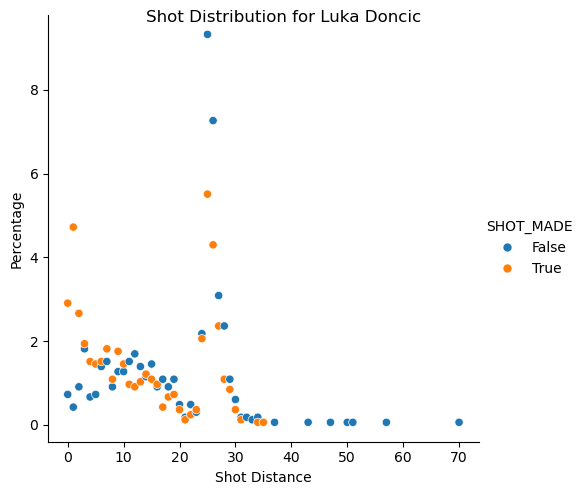

In [7]:
sbplt = sns.relplot(data = shot_list[0], x = "SHOT_DISTANCE", y = "Percentage",  hue = 'SHOT_MADE')
sbplt.set_axis_labels('Shot Distance')
sbplt.figure.suptitle('Shot Distribution for Luka Doncic')
plt.show()

## Heatmaps

Expanding on the difference with Matplotlib, one notable chart type added that we want to highlight are heatmaps. 

To start, we will import the court stencil overlay

In [2]:
img = mpimg.imread('court_image.png')

Then we want to select the player and pull shot locations for that player as well as if they made the shots. We will use Steph Curry's Data for our example.

In [4]:
# Data Manipulation using Pandas
data  = pd.read_csv('NBA_2024_Shots.csv')

subset  = data[['PLAYER_NAME','SHOT_MADE', 'LOC_X','LOC_Y']]

# Select Player 
player = 'Stephen Curry'
# Pull Shot locations for a player 
sshots = subset[subset['PLAYER_NAME'] == player]

# Shot locations for player made shots
smakes  = sshots[sshots['SHOT_MADE']== True]

# Pass into final data frmae for mapping
[x,y]= smakes["LOC_X"], smakes["LOC_Y"]

stephframe ={'X':x,"Y":y}

sf = pd.DataFrame(stephframe)

From there we would use Seaborn to create a heatmap

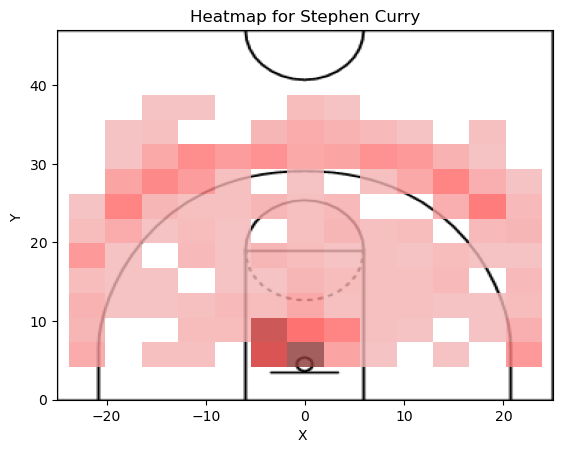

In [5]:
# Use Seaborn's Histplot to create heatmap
asd = sns.histplot(x = sf["X"], y =sf["Y"],zorder = 2,alpha=.8, color= 'red'cbar=True,cbar_kws={'label':'Number of Shots Made in at Location'} ) 

#Insert overlay image with proper dimensions
asd.imshow(img,aspect= asd.get_aspect(),extent = [-25,25,0,47] , zorder= 1)

# Present Figure     
plt.xlabel('X ')
plt.ylabel('Y ')
plt.title('Heatmap for {}'.format(player))
plt.show()  

## Multiplot

Creates a new data only showing information for when shots were made

In [8]:
shots_made = data[data['SHOT_MADE'] == True]

Collects the team names found in the data set created above and splits them in half for separate multi-plots

In [9]:
unique_teams = shots_made['TEAM_NAME'].unique()

first_15_teams = unique_teams[:15]
second_15_teams = unique_teams[15:30] 

Filters the data where shots were made for the first 15 teams and second 15 teams

In [11]:
first_15_data = shots_made[shots_made['TEAM_NAME'].isin(first_15_teams)]

second_15_data = shots_made[shots_made['TEAM_NAME'].isin(second_15_teams)]

Creates first multi-plot based on the first 15 team's data

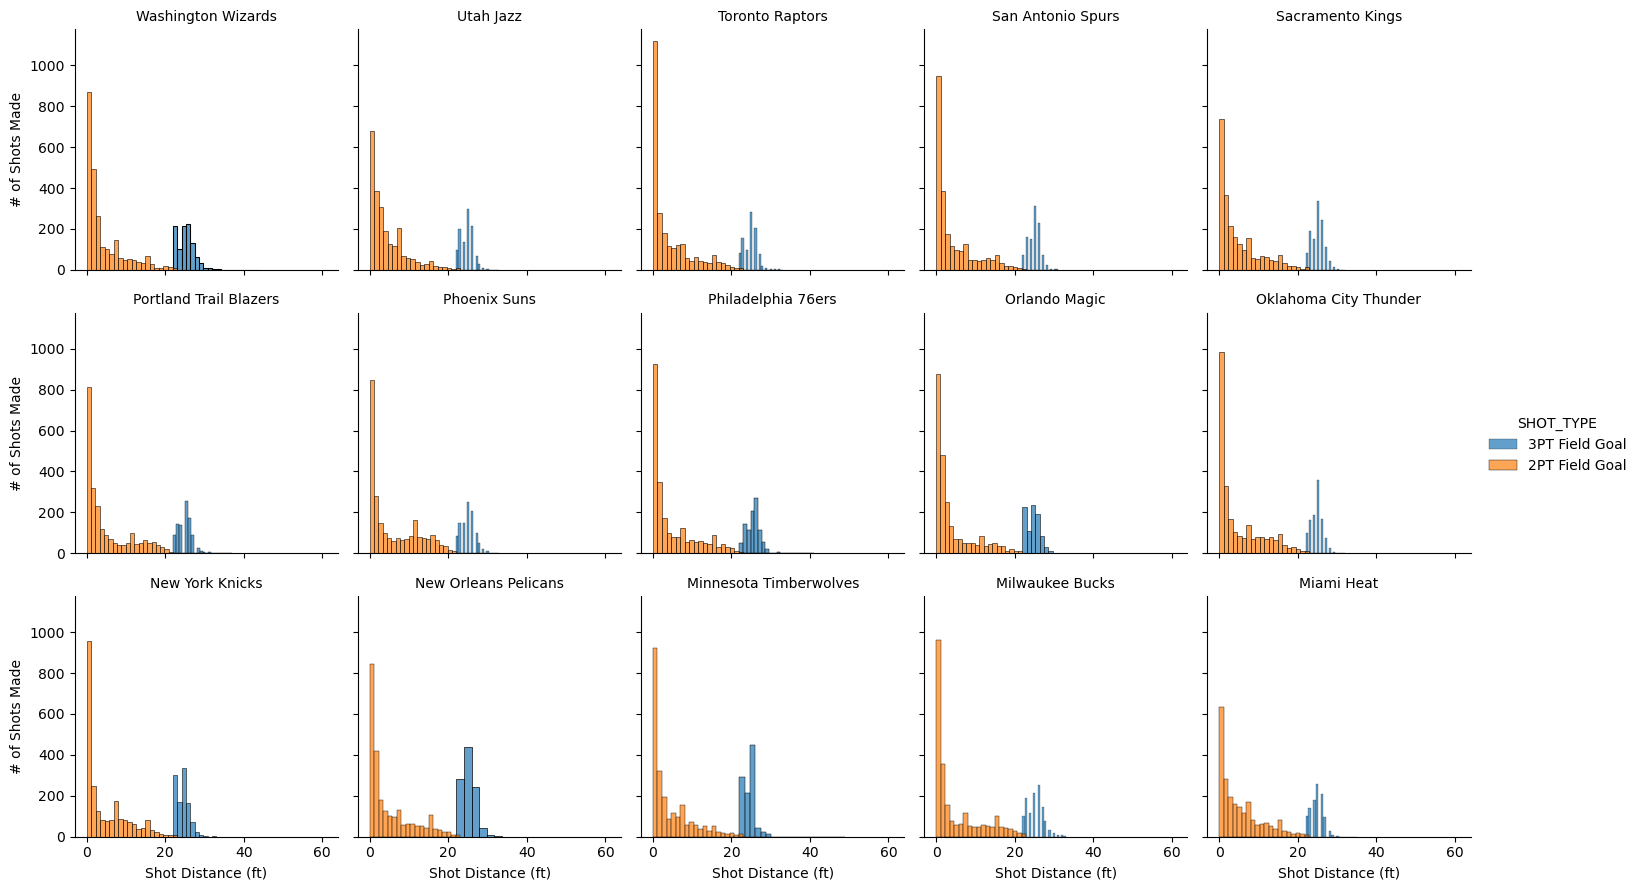

In [12]:
# creates the FacetGrid, faceting by team and using shot type as hue
g1 = sns.FacetGrid(first_15_data, col="TEAM_NAME", hue="SHOT_TYPE", col_wrap=5, height=3)

# map a histogram plot for shot distance
g1.map(sns.histplot, "SHOT_DISTANCE", bins=20, alpha=0.7)

# adds a legend to show shot types based on hue parameter
g1.add_legend()

# sets axis labels
g1.set_axis_labels("Shot Distance (ft)", "# of Shots Made")

# sets the label of each plot by team name
g1.set_titles("{col_name}")

g1

Creates second multi-plot based on second 15 team's data 

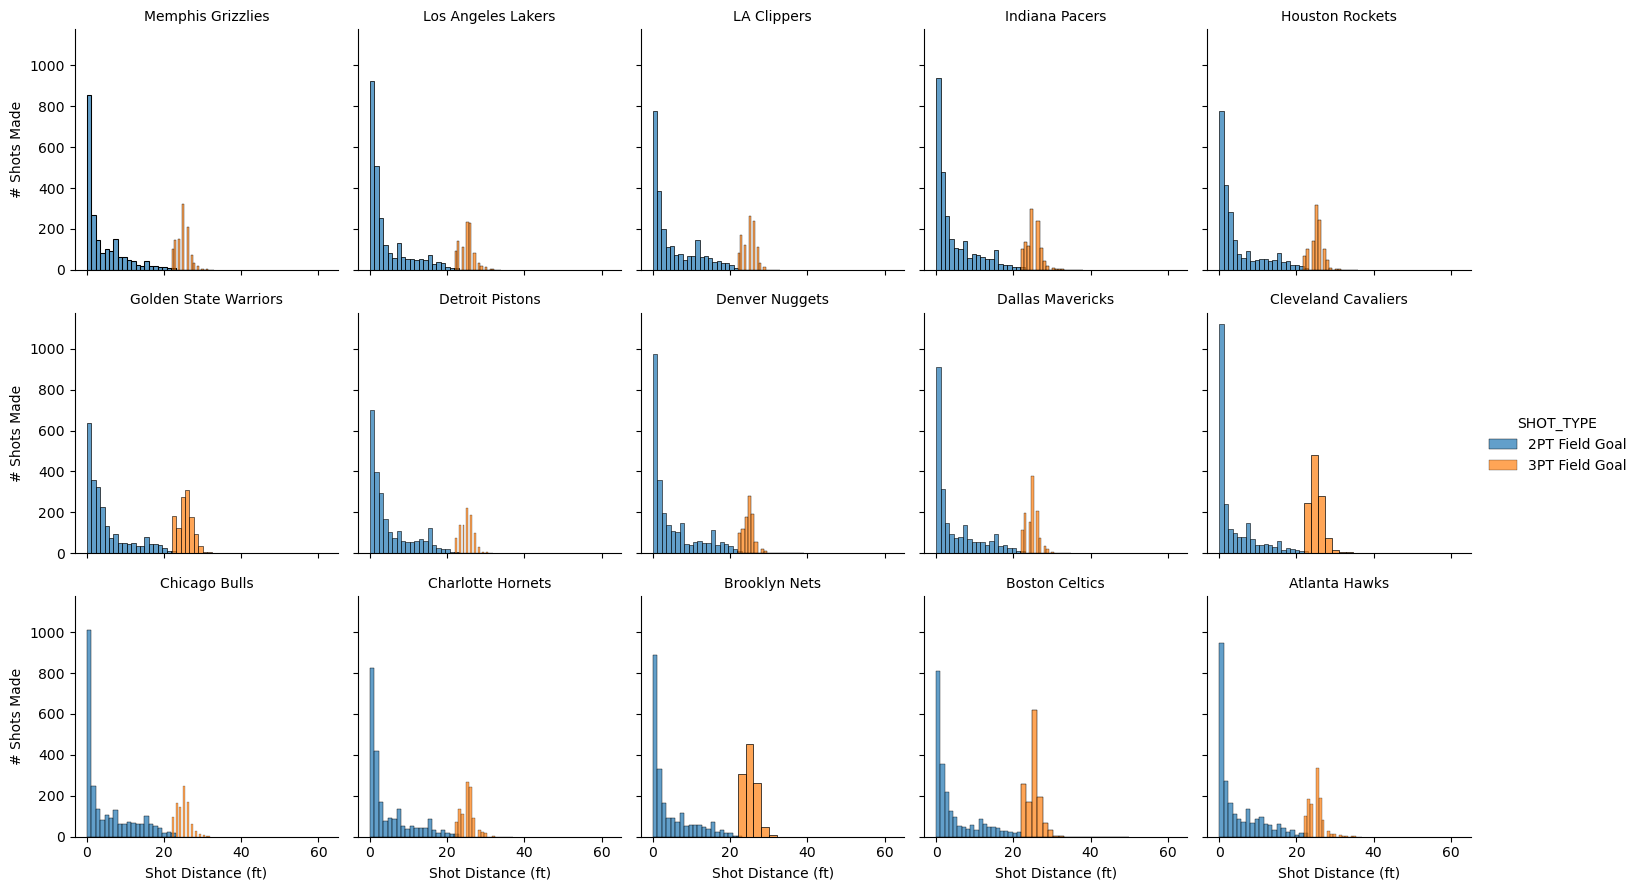

In [13]:
# creates the FacetGrid, faceting by team and using shot type as hue
g2 = sns.FacetGrid(second_15_data, col="TEAM_NAME", hue="SHOT_TYPE", col_wrap=5, height=3)

# map a histogram plot for shot distance
g2.map(sns.histplot, "SHOT_DISTANCE", bins=20, alpha=0.7)

# adds a legend to show shot typesbased on hue parameter
g2.add_legend()

# sets axis labels
g2.set_axis_labels("Shot Distance (ft)", "# Shots Made")

# sets the label of each plot by team name
g2.set_titles("{col_name}")

g2